In [1]:
import numpy as np
import csv
import itertools
import matplotlib
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt
from cycler import cycler
import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pwlf


In [2]:
import sys

In [3]:
sys.executable


'/usr/local/opt/python/bin/python3.7'

In [4]:
matplotlib.__version__

'3.2.1'

## JHU data

In [5]:
def get_data(jhu_file):
    dat = []
    with open(jhu_file, newline='') as csvfile:
        myreader = csv.reader(csvfile, delimiter=',')
        popdat = []
        i = 0
        for row in myreader:
            if i != 0:
                poplist = []
                j = 0
                for elt in row:
                    if j >= 4:
                        poplist.append(int(elt))
                    elif j == 0:
                        poplist.append(elt)
                    elif j == 1:
                        poplist[0]=(elt,poplist[0])
                    j = j+1
                popdat.append(poplist)
            else:
                popdat.append(row)
            # print(popdat[i])
            i = i + 1;
    popdat0=['date']
    for elt in popdat[0][4:]:
        popdat0.append(elt)
    popdat[0] = popdat0
    totals = np.zeros(len(popdat[0])-1,dtype=int)
    for row in popdat[1:]:
        totals = totals + np.array(row[1:])
    # print(totals)
    popkeyed = {poplist[0]: poplist[1:] for poplist in popdat}
    popkeyed.update({'dates':popdat[0][1:]})
    popkeyed.update({('world',''):totals})
    # popkeyed[('Canada', 'Ontario')]
    # popkeyed['dates']
    return popkeyed

In [6]:
confirmed = get_data('../data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = get_data('../data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = get_data('../data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid_ts = {'confirmed':confirmed,'deaths':deaths,'recovered':recovered}

In [13]:
def plotCountry(country_s, datatype):
    countries = []
    if isinstance(country_s,list):
        for country in country_s:
            if isinstance(country,str):
                country = (country,'')
            countries.append(country)
    elif isinstance(country_s,str):
        countries = [(country_s,'')]
    else:
        countries = [country_s]
            
    popkeyed = covid_ts[datatype]
    dates = popkeyed['dates']
    fmt = '%m/%d/%y'
    xx = [datetime.datetime.strptime(dd,fmt) for dd in dates ]
    day0 = datetime.datetime.strptime(dates[0],fmt)
    xxi = [float((datetime.datetime.strptime(dd,fmt)-day0).days) for dd in dates ]
    # print(xxi)
    # locator = mdates.MonthLocator()
    locator = mdates.AutoDateLocator(minticks=5, maxticks=13)
    formatter= mdates.ConciseDateFormatter(locator)
    
    fig,ax = plt.subplots(1,1,figsize=(20,10))      
    colors =  ['k', 'b', 'c', 'm', 'y', 'g', 'r']
    i = 0
    for country in countries:
            yy = popkeyed[country]
            yyf = [float(y) for y in yy]
            ax.plot(xx, yy, 'o--', color = colors[i], alpha=0.3, label = country[0])
            
            # initialize piecewise linear fit with your x and y data
            my_pwlf = pwlf.PiecewiseLinFit(xxi, yyf)
            # fit the data for four line segments
            res = my_pwlf.fit(4)

            # predict for the determined points
            xHat = np.linspace(min(xxi), max(xxi), num=len(xx))
            # print(len(xHat),len(xxi))
            yHat = my_pwlf.predict(xHat)
            ax.plot(xx, yHat, color = colors[i], alpha=0.3, label = country[0]+' fit')
            i = i+1
    # ax.step(xx,yy)
    #ax.plot(xx, yy, 'o--', color='black', alpha=0.3)
    
    
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
    if len(countries) == 1:
        plt.title(country[0]+'-'+country[1]+' '+datatype)
    else:
        plt.legend(loc="upper left")
        plt.title('countries '+datatype)

/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/si

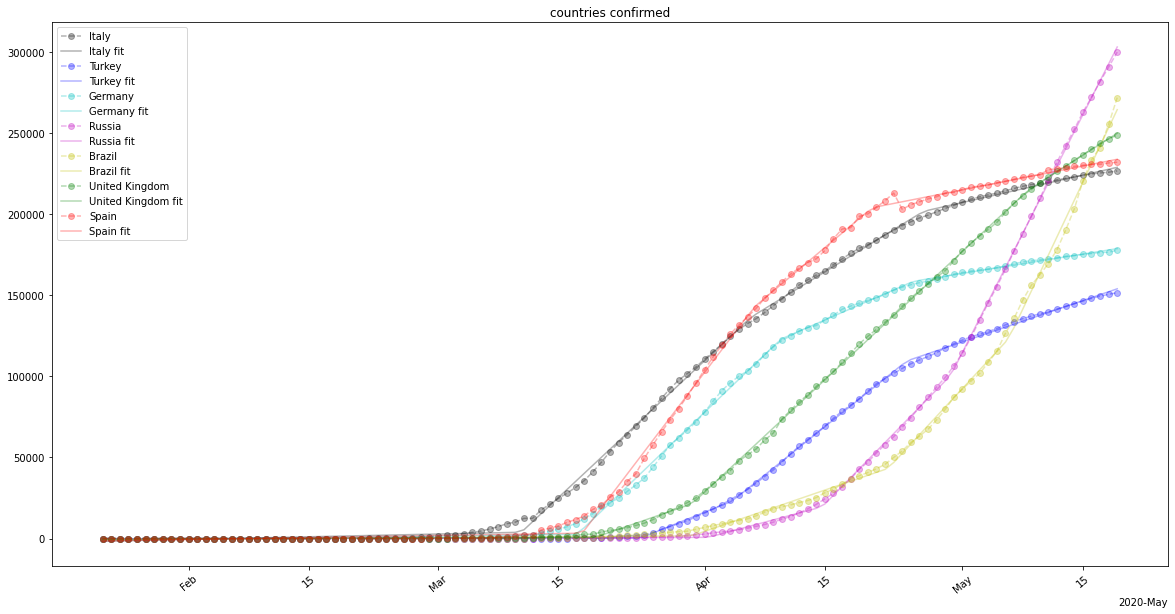

In [14]:
plotCountry(['Italy','Turkey','Germany','Russia','Brazil','United Kingdom','Spain'],'confirmed')

/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


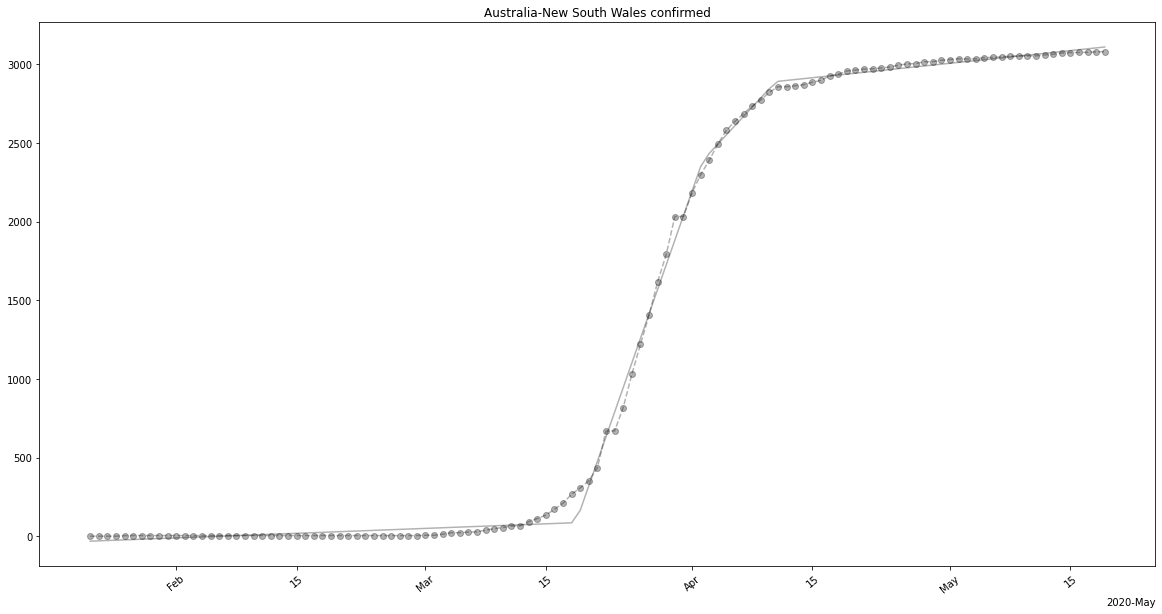

In [15]:
plotCountry(('Australia','New South Wales'),'confirmed')
#plotCountry(('Austria',''))

/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


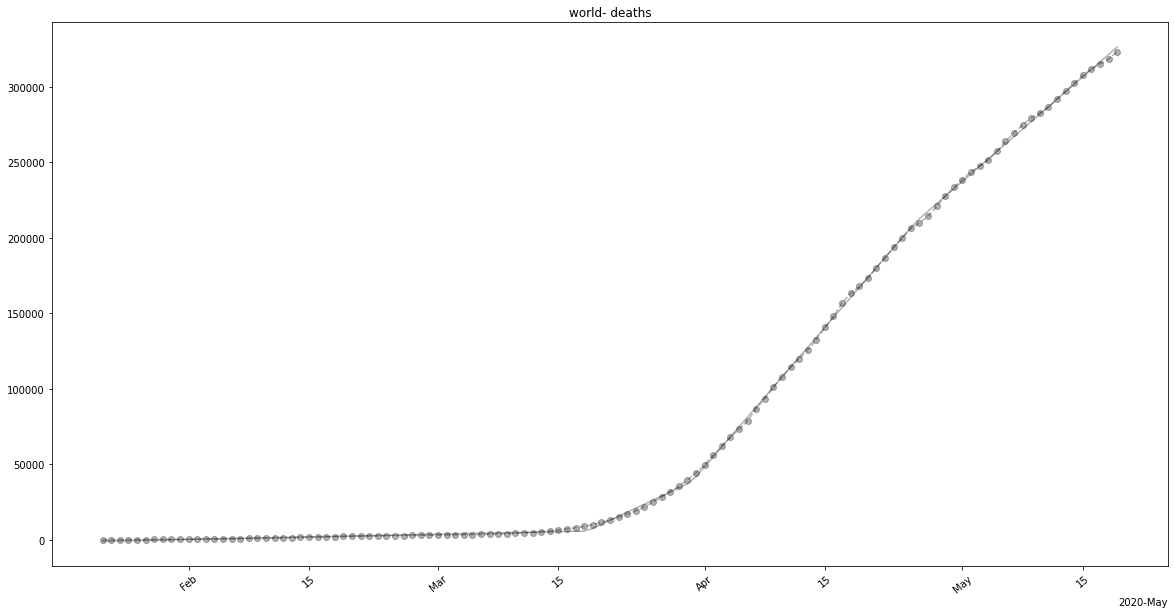

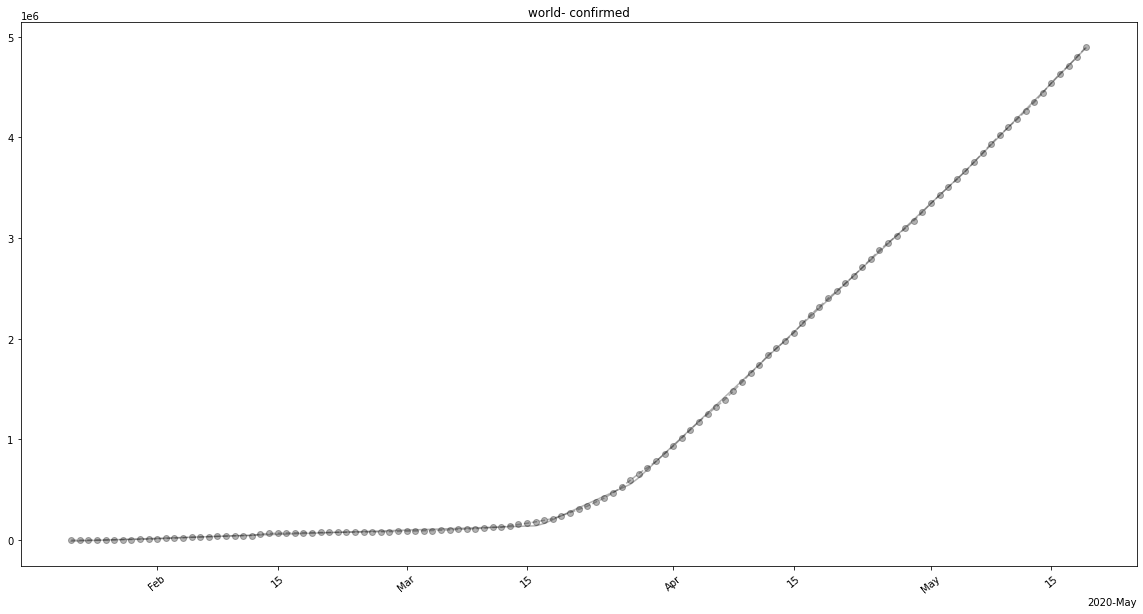

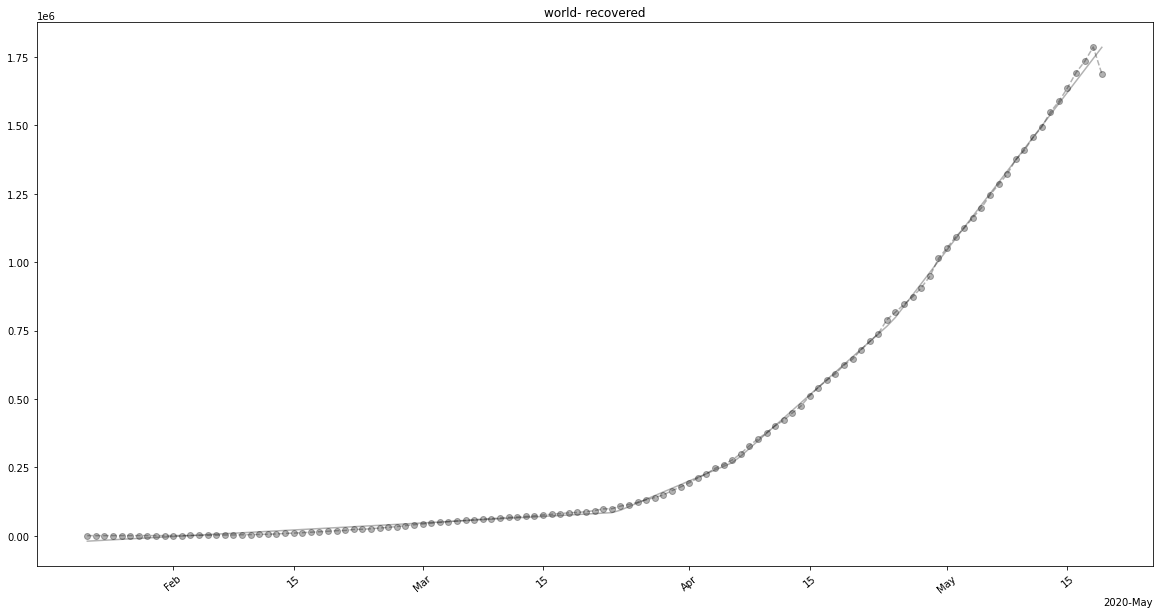

In [16]:
plotCountry('world','deaths')
plotCountry('world','confirmed')
plotCountry('world','recovered')

/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/site-packages/pwlf/pwlf.py:1110: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


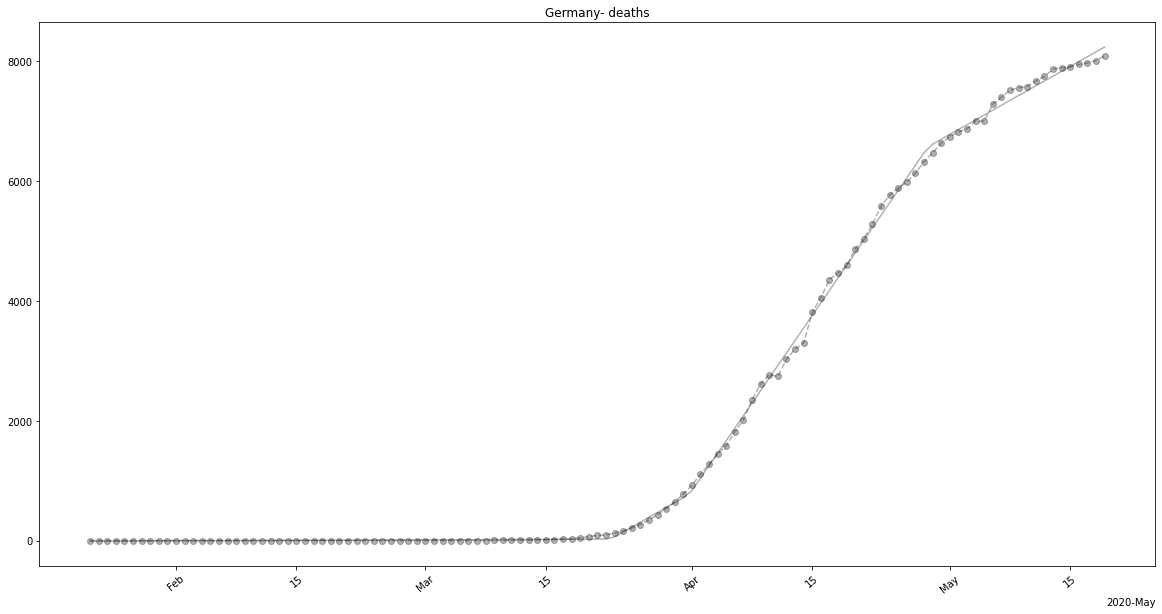

In [17]:
plotCountry('Germany','deaths')

## OWID data

In [ ]:
owid_file = '../covid-19-data/public/data/owid-covid-data.csv'
dat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        dat.append(row)

In [ ]:
dat[0].keys()

In [ ]:
dates = set([dd['date'] for dd in dat])
len(dates)

In [ ]:
set([(d['iso_code'],d['location']) for d in dat])

In [ ]:
countries = list(set([dd['iso_code'] for dd in dat]))

In [ ]:
deathUSA = [(dd['date'],dd['new_deaths']) for dd in dat if dd['iso_code']=='USA']

fmt = '%Y-%m-%d'
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in deathUSA if int(dd[1])>0 ]
yy = [int(dd[1]) for dd in deathUSA if int(dd[1])>0 ]

locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA new deaths')
plt.show()

In [ ]:
def plotTarget(iso,targ='new_deaths'):
    datt = [(dd['date'],dd[targ]) for dd in dat if dd['iso_code']==iso]
    deathstr = 'death'+iso
    fmt = '%Y-%m-%d'
    
    start=False
    xx = [] ; yy = []
    for i in range(len(datt)):
        dd = datt[i]
        if float(dd[1]) == 0:
            if start==False:
                continue
            else:
                pass
        else:
            if start==False:
                start=True
        if start:
            xx.append(datetime.datetime.strptime(dd[0],fmt))
            yy.append(float(dd[1]))
        
#    xx = [datetime.datetime.strptime(dd[0],fmt) for dd in datt if float(dd[1])>0 ]
#    yy = [float(dd[1]) for dd in datt if int(dd[1])>0 ]

    locator = mdates.MonthLocator()
    formatter= mdates.ConciseDateFormatter(locator)

    register_matplotlib_converters() # pandas made me do it
    fig,ax = plt.subplots(1,1)
    ax.step(xx,yy)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
        plt.title(iso+' '+targ)
    plt.show()

In [ ]:
plotTarget('DEU')

In [ ]:
plotTarget('DEU','new_cases')

In [ ]:
plotTarget('USA','new_cases')

In [ ]:
plotTarget('FRA','new_cases')

In [ ]:
plotTarget('SWE','new_cases')

In [ ]:
plotTarget('SWE','new_deaths')

In [ ]:
plotTarget('BRA','new_deaths')

## Oxford data

In [ ]:
owid_file = '../covid-policy-tracker/data/OxCGRT_latest.csv'
oxdat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        oxdat.append(row)
    

In [ ]:
oxdat[0].keys()

In [ ]:
countries = list(set([(dd['CountryName'],dd['CountryCode']) for dd in oxdat]))

In [ ]:
[countries[i] for i in range(10)]

In [ ]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) for dd in oxdat if dd['CountryCode']=='USA']

In [ ]:
xx = [foo[i] for i in range(10)]

In [ ]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) 
       for dd in oxdat if dd['CountryCode']=='USA']

fmt = '%Y%m%d'
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in foo]
yy = []
for dd in foo:
    try:
        yy.append(float(dd[1]))
    except:
        yy.append(float('NaN'))


locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA')
plt.show()

Note:  no wildcard data:

In [ ]:
foo = [(dd['Date'],dd['CountryCode'],dd['M1_Wildcard']) 
       for dd in oxdat if dd['M1_Wildcard'] != '']



In [ ]:
foo


Notes:  
* first version of `datcodes` leaves out all flags (general vs. targeted implementation)
* 2nd version leaves out all variables measured in dollars

In [ ]:
datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures', 
            'E4_International support', 'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing', 
            'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']

datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 
            'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing']



In [ ]:
countrycodes = list(set([dd['CountryCode'] for dd in oxdat]))
len(countrycodes)

In [ ]:
def Float(x):
    try:
        rtn = float(x)
    except:
        rtn = float('NaN')
    return rtn


In [ ]:
def get_codedat(countrycode='USA'):
    codedat = []
    foo = [[dd['Date']]+ [Float(dd[c]) for c in datcodes]
           for dd in oxdat if dd['CountryCode']==countrycode]
    return foo
    


In [ ]:
get_codedat()

### Response policy maps

* time along x axis 
* NaN same color as max value (typically 4)
* 12 rows for presence of 12 factors.  cf oxford codebook.md in ../covid-policy-tracker/documentation/.

In [ ]:
foo = get_codedat('DEU')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');
plt.title('DEU')


In [ ]:
foo = get_codedat('USA')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');
plt.title("USA")

In [ ]:
foo = get_codedat('KOR')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');

In [ ]:
foo = get_codedat('FRA')
fmt = '%Y%m%d'

locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)
xx =[datetime.datetime.strptime(dd[0],fmt) for dd in foo]
foo = [f[1:] for f in foo]

register_matplotlib_converters() # pandas made me do it
fig,ax = plt.subplots(1,1)
ax.imshow(np.transpose(foo),cmap='hot',aspect='auto');
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)

plt.show()